In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

filename = 'moonlanding.png'

# im = cv2.imread(filename)
# noised_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

im = plt.imread(filename)
noised_im = im
# plt.figure()
# plt.imshow(im)
# plt.title('Original image') 

# print(im.shape)
# noise = np.random.normal(0, 0.0, im.shape) # full image noise
# noise_mask_x = np.hstack((np.array(range(1, int(0.5 * x - 0.1 * x))), 
#                  np.array(range(int(0.5 * x + 0.1 * x), x))))
# noise_mask_y = np.hstack((np.array(range(1, int(0.5 * y - 0.1 * y))), 
#                  np.array(range(int(0.5 * y + 0.1 * y), y))))
# noise[noise_mask_x, :] = 0
# noise[:, noise_mask_y] = 0
# noised_im = im + noise

# print(noised_im.shape)
# plt.figure()
# plt.imshow(noised_im)
# plt.title('Noised image')

while True:
   cv2.imshow('Press ESC to quit', noised_im)
   k = cv2.waitKey(1)
   if k == 27:
      break
cv2.destroyAllWindows()

C:\Users\German\AppData\Local\Temp\ipykernel_22576\1660449212.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  denoised_im[:,:] = peaks_fft2  # np.abs(peaks_fft2)


Text(0.5, 1.0, 'Noised Image')

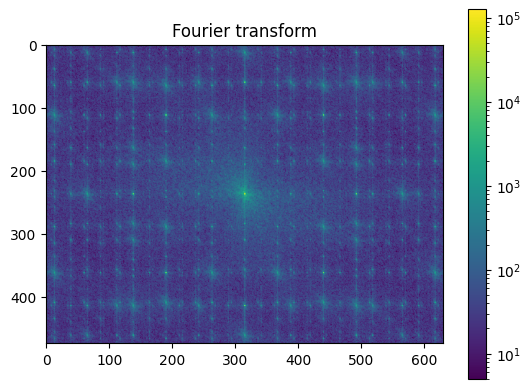

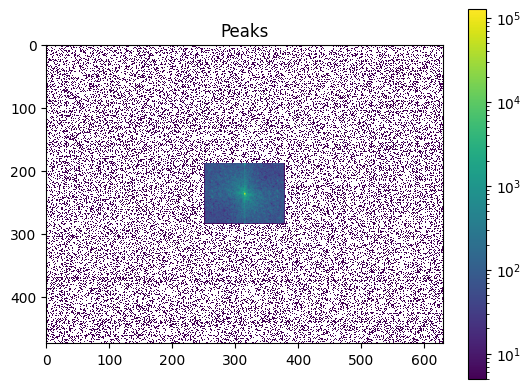

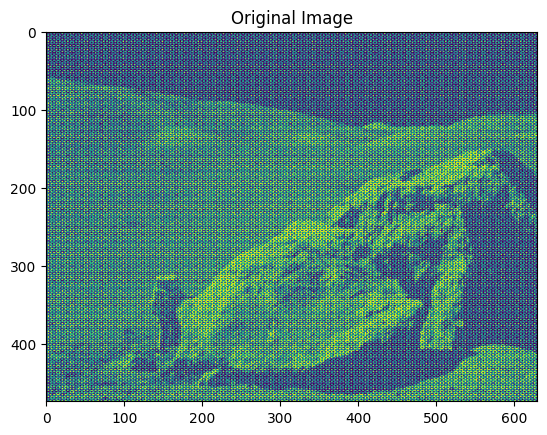

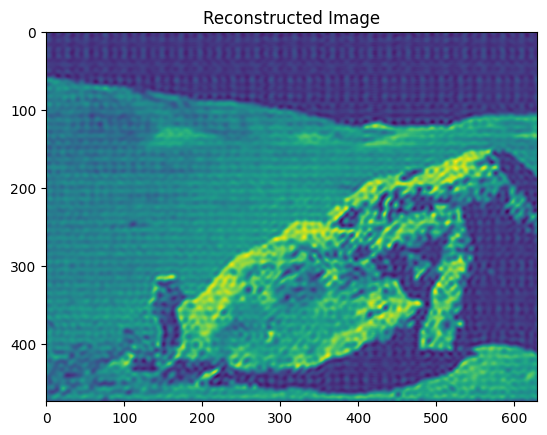

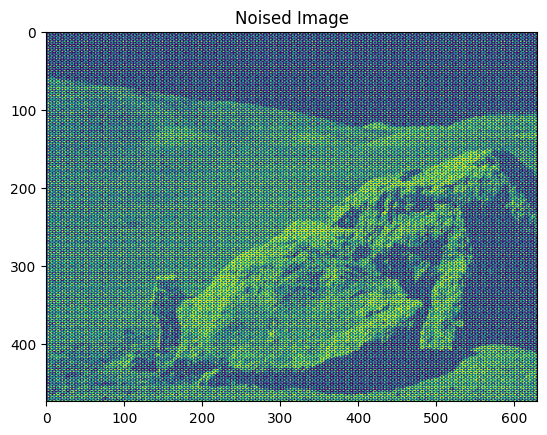

In [3]:
from numpy.fft import fft, ifft, fftshift, ifftshift
from matplotlib.colors import LogNorm


(x, y) = noised_im.shape

def plot_spectrum(im_fft):    
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

center_mask_x = np.hstack((np.array(range(1, int(0.5 * x - 0.1 * x))), 
                 np.array(range(int(0.5 * x + 0.1 * x), x))))
center_mask_y = np.hstack((np.array(range(1, int(0.5 * y - 0.1 * y))), 
                 np.array(range(int(0.5 * y + 0.1 * y), y))))

denoised_im = np.zeros_like(noised_im)

noised_im_fft = fft(noised_im[:,:], axis=0)
noised_im_fft2 = fft(noised_im_fft, axis=1)
noised_im_fft2 = fftshift(noised_im_fft2)
peaks = noised_im_fft2.copy()

# threshold = np.abs(np.amax(noised_im_fft2))
# print(threshold)
# for j in range(x):
#     for k in range(y):
#         if np.abs(noised_im_fft2[j,k]) > 0.5*threshold:
#             peaks[j,k] = noised_im_fft2[j,k]

peaks[center_mask_x, :] = 0
peaks[:,center_mask_y] = 0

# peaks[np.abs(peaks) < 1000*np.abs(peaks.mean())] = 0

ipeaks = ifftshift(peaks)
peaks_fft = ifft(ipeaks, axis=1)
peaks_fft2 = ifft(peaks_fft, axis=0)
denoised_im[:,:] = peaks_fft2  # np.abs(peaks_fft2)

plt.figure()
plot_spectrum(noised_im_fft2)
plt.title('Fourier transform')

plt.figure()
plot_spectrum(peaks)
plt.title('Peaks')

plt.figure()
plt.imshow(im)
plt.title('Original Image')
plt.figure()
plt.imshow(denoised_im)
plt.title('Reconstructed Image')
plt.figure()
plt.imshow(noised_im)
plt.title('Noised Image')

In [4]:
while True:
   cv2.imshow('Press ESC to quit', denoised_im)
   k = cv2.waitKey(1)
   if k == 27:
      break
cv2.destroyAllWindows()

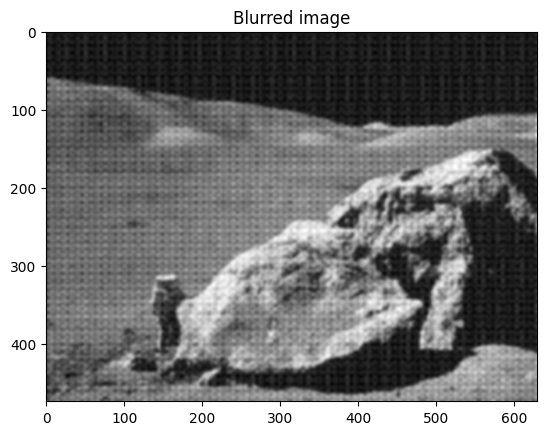

In [5]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(noised_im, 2)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()